In [1]:
# Import the necessary packages to perform the data analysis

# packages to process and visualize the data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# packages to improve visual description and analysis
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
import os

Import the dataset of top 2000 companies

In [2]:
path='./data/'

In [4]:
docs=os.listdir(path)
os.listdir(path)

['panama_papers.edges.csv',
 'panama_papers.nodes.address.csv',
 'panama_papers.nodes.entity.csv',
 'panama_papers.nodes.intermediary.csv',
 'panama_papers.nodes.officer.csv']

In [52]:
df_edges_raw = pd.read_csv(path + docs[0])
df_address_raw = pd.read_csv(path + docs[1])
df_entity_raw = pd.read_csv(path + docs[2])
df_intermediary_raw = pd.read_csv(path + docs[3])
df_officier_raw = pd.read_csv(path + docs[4])

**1) Map the tax heavens jurisdiction in terms of the number of entities they have registered**

In [53]:
df_entity_raw['jurisdiction_description'].unique()

array(['Samoa', 'Panama', 'Nevada', 'United Kingdom', 'Singapore',
       'Ras Al Khaimah', 'Isle Of Man', 'British Anguilla', 'Seychelles',
       'Niue', 'Uruguay', 'British Virgin Islands', 'Hong Kong',
       'New Zealand', 'Bahamas', 'Cyprus', 'Malta', 'Belize', 'Jersey',
       'Wyoming', 'Costa Rica'], dtype=object)

In [54]:
df_entity_S1=df_entity_raw
vc=df_entity_S1.jurisdiction_description.value_counts()
tax_heavens_L=list(vc[vc > 1000].index)
tax_heavens_S=list(vc[vc <= 1000].index)
df_entity_S1.loc[~df_entity_S1.jurisdiction_description.isin(tax_heavens_L), 'jurisdiction_description'] = 'Others'
df_entity_S1.jurisdiction_description.value_counts()

British Virgin Islands    113648
Panama                     48360
Bahamas                    15915
Seychelles                 15182
Niue                        9611
Samoa                       5307
British Anguilla            3253
Nevada                      1260
Others                      1098
Name: jurisdiction_description, dtype: int64

Countries in Others category are:  ['Hong Kong', 'United Kingdom', 'Belize', 'Costa Rica', 'Cyprus', 'Uruguay', 'New Zealand', 'Jersey', 'Wyoming', 'Malta', 'Isle Of Man', 'Ras Al Khaimah', 'Singapore']


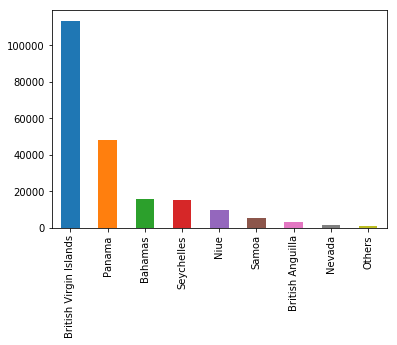

In [57]:
df_entity_S1.jurisdiction_description.value_counts().plot(kind='bar')
print('Countries in Others category are: ',tax_heavens_S)

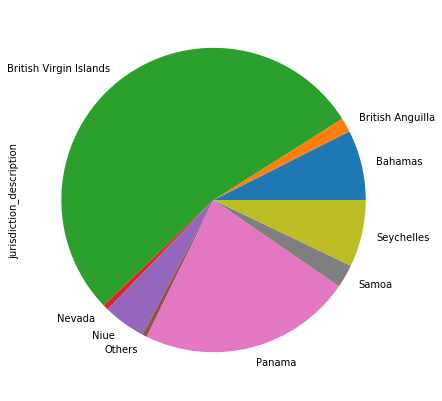

In [56]:
df_entity_S1.jurisdiction_description.value_counts().sort_index().plot(kind='pie', figsize=(7, 7))

In [24]:
df_entity_raw['countries'].unique()

array(['Hong Kong', 'Taiwan', 'China', 'Switzerland', 'Singapore',
       'Brazil', 'Panama', 'Samoa', 'Liechtenstein', 'Spain', 'Thailand',
       'Colombia', 'Jersey', 'Andorra', 'Seychelles', 'Ireland',
       'Belgium', 'Israel', 'Gibraltar', 'Guernsey',
       'United Arab Emirates', 'Cyprus', 'Venezuela', 'Isle of Man',
       'Lebanon', 'Denmark', 'Uruguay', 'Jordan', 'Bahamas',
       'United Kingdom', nan, 'Belize', 'Luxembourg', 'Ecuador',
       'Guatemala', 'Germany', 'Mauritius', 'Turkey', 'United States',
       'Monaco', 'Estonia', 'Niue', 'Czech Republic', 'Netherlands',
       'Hungary', 'Costa Rica', 'Portugal', 'Cayman Islands',
       'South Africa', 'Malta', 'New Zealand', "Côte d'Ivoire",
       'Dominican Republic', 'France', 'Italy', 'Canada', 'Russia',
       'Greece', 'Saudi Arabia', 'Qatar', 'Mexico', 'Peru', 'Bermuda',
       'El Salvador', 'Australia', 'Saint Kitts and Nevis', 'Argentina',
       'Japan', 'Austria', 'American Samoa', 'Paraguay', 'Chile', 'E